In [92]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.grid_search import GridSearchCV

In [67]:
data = pd.read_csv('../datasets/train.tsv', sep='\t', na_values='?')

In [68]:
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', '')).fillna('')
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', '')).fillna('')

In [69]:
# data = pd.get_dummies(data, columns=['alchemy_category'])
# data

In [70]:
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 
         'Coefficient' : model.coef_[0] , 
         'Feature' : df.columns
        }
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]

In [71]:
v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=50, # Only use the top 50 most common words
)

In [72]:
X = v.fit_transform(data.title).todense()
X2 = v.fit_transform(data.body).todense()
X3 = v.fit_transform(data.body+data.title).todense()

In [73]:
X = pd.DataFrame(X, columns=v.get_feature_names())
X2 = pd.DataFrame(X2, columns=v.get_feature_names())
X3 = pd.DataFrame(X3, columns=v.get_feature_names())

In [56]:
# X_total = 

In [57]:
# X3.describe()

In [23]:
# data = pd.concat([data, X], axis=1) #!!!!!!!!!!!!!!!

In [77]:
# l1 = Lasso
# l2 = Ridge
logistic_model_1 = LogisticRegression(penalty='l1')

In [78]:
logistic_model_1.fit(X3, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
logistic_model_1.score(X3, y)

0.77687626774847873

In [80]:
logistic_model_2 = LogisticRegression(penalty='l1', C=0.1)

In [82]:
logistic_model_2.fit(X3, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
logistic_model_2.score(X3, y)

0.77498309668695065

In [84]:
logistic_model_3 = LogisticRegression(penalty='l1', C=10)

In [85]:
logistic_model_3.fit(X3, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
logistic_model_3.score(X3, y)

0.77701149425287352

In [99]:
model = LogisticRegression()
Cs = [.1, .5, 1, 5, 10, 50, 100, 23.5]
Ls = ['l1', 'l2']
grid = GridSearchCV(estimator=model, 
                    param_grid={'C': Cs,
                                'penalty': Ls
                               },
                    verbose=10,
                    cv = 6
                    
                   )

In [100]:
grid

GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 1, 5, 10, 50, 100, 23.5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [101]:
grid.fit(X3, y)

Fitting 6 folds for each of 16 candidates, totalling 96 fits
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.764801 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.763179 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.767234 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.790754 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.774351 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.763607 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.2s


[CV] ...................... penalty=l2, C=0.1, score=0.768856 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.771290 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.793998 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.777597 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.762794 -   0.0s
[CV] penalty=l1, C=0.5 ...............................................
[CV] ...................... penalty=l1, C=0.5, score=0.767234 -   0.0s
[CV] penalty=l1, C=0.5 ...............................................
[CV] ...................... penalty=l1, C=0.5, score=0.768045 -   0.0s
[CV] penalty=l1, C=0.5 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.5s


[CV] ...................... penalty=l1, C=0.5, score=0.793998 -   0.0s
[CV] penalty=l1, C=0.5 ...............................................
[CV] ...................... penalty=l1, C=0.5, score=0.776786 -   0.0s
[CV] penalty=l1, C=0.5 ...............................................
[CV] ...................... penalty=l1, C=0.5, score=0.763607 -   0.0s
[CV] penalty=l2, C=0.5 ...............................................
[CV] ...................... penalty=l2, C=0.5, score=0.768856 -   0.0s
[CV] penalty=l2, C=0.5 ...............................................
[CV] ...................... penalty=l2, C=0.5, score=0.767234 -   0.0s
[CV] penalty=l2, C=0.5 ...............................................
[CV] ...................... penalty=l2, C=0.5, score=0.772101 -   0.0s
[CV] penalty=l2, C=0.5 ...............................................
[CV] ...................... penalty=l2, C=0.5, score=0.793998 -   0.0s
[CV] penalty=l2, C=0.5 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.8s


[CV] ........................ penalty=l2, C=1, score=0.772101 -   0.0s
[CV] penalty=l2, C=1 .................................................
[CV] ........................ penalty=l2, C=1, score=0.793998 -   0.0s
[CV] penalty=l2, C=1 .................................................
[CV] ........................ penalty=l2, C=1, score=0.774351 -   0.0s
[CV] penalty=l2, C=1 .................................................
[CV] ........................ penalty=l2, C=1, score=0.761170 -   0.0s
[CV] penalty=l1, C=5 .................................................
[CV] ........................ penalty=l1, C=5, score=0.768856 -   0.0s
[CV] penalty=l1, C=5 .................................................
[CV] ........................ penalty=l1, C=5, score=0.766423 -   0.0s
[CV] penalty=l1, C=5 .................................................
[CV] ........................ penalty=l1, C=5, score=0.771290 -   0.0s
[CV] penalty=l1, C=5 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    1.1s


[CV] ........................ penalty=l1, C=5, score=0.761170 -   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] ........................ penalty=l2, C=5, score=0.769667 -   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] ........................ penalty=l2, C=5, score=0.767234 -   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] ........................ penalty=l2, C=5, score=0.772912 -   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] ........................ penalty=l2, C=5, score=0.793998 -   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] ........................ penalty=l2, C=5, score=0.773539 -   0.0s
[CV] penalty=l2, C=5 .................................................
[CV] ........................ penalty=l2, C=5, score=0.761170 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.3s


[CV] ....................... penalty=l1, C=10, score=0.767234 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ....................... penalty=l1, C=10, score=0.772101 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ....................... penalty=l1, C=10, score=0.793998 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ....................... penalty=l1, C=10, score=0.773539 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ....................... penalty=l1, C=10, score=0.761170 -   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.769667 -   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.767234 -   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:    1.7s


[CV] ....................... penalty=l1, C=50, score=0.793998 -   0.0s
[CV] penalty=l1, C=50 ................................................
[CV] ....................... penalty=l1, C=50, score=0.773539 -   0.0s
[CV] penalty=l1, C=50 ................................................
[CV] ....................... penalty=l1, C=50, score=0.761170 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.769667 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.767234 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.772912 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.793998 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:    2.1s


[CV] ...................... penalty=l1, C=100, score=0.761170 -   0.0s
[CV] penalty=l2, C=100 ...............................................
[CV] ...................... penalty=l2, C=100, score=0.769667 -   0.0s
[CV] penalty=l2, C=100 ...............................................
[CV] ...................... penalty=l2, C=100, score=0.767234 -   0.0s
[CV] penalty=l2, C=100 ...............................................
[CV] ...................... penalty=l2, C=100, score=0.772912 -   0.0s
[CV] penalty=l2, C=100 ...............................................
[CV] ...................... penalty=l2, C=100, score=0.793998 -   0.0s
[CV] penalty=l2, C=100 ...............................................
[CV] ...................... penalty=l2, C=100, score=0.773539 -   0.0s
[CV] penalty=l2, C=100 ...............................................
[CV] ...................... penalty=l2, C=100, score=0.761170 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  84 tasks       | elapsed:    2.4s


[CV] ..................... penalty=l1, C=23.5, score=0.767234 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.772912 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.793998 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.773539 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.761170 -   0.0s
[CV] penalty=l2, C=23.5 ..............................................
[CV] ..................... penalty=l2, C=23.5, score=0.769667 -   0.0s
[CV] penalty=l2, C=23.5 ..............................................
[CV] ..................... penalty=l2, C=23.5, score=0.767234 -   0.0s
[CV] penalty=l2, C=23.5 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    2.7s finished


GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 1, 5, 10, 50, 100, 23.5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [102]:
grid.best_score_

0.77417173766058145

In [103]:
grid.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
grid.best_estimator_.fit(X3, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
grid.best_estimator_.score(X3, y)

0.77647058823529413

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

In [107]:
predictions = grid.best_estimator_.predict(X3)

In [108]:
confusion_matrix(y, predictions)

array([[3230,  369],
       [1284, 2512]])

In [110]:
print classification_report(y, predictions)

             precision    recall  f1-score   support

          0       0.72      0.90      0.80      3599
          1       0.87      0.66      0.75      3796

avg / total       0.80      0.78      0.77      7395



In [111]:
import seaborn as sns

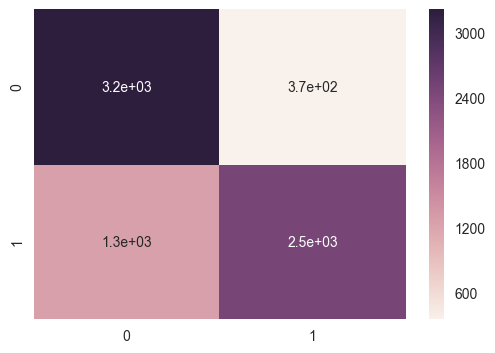

In [112]:
sns.heatmap(confusion_matrix(y, predictions), annot=True)

In [113]:
pd.plot_params?

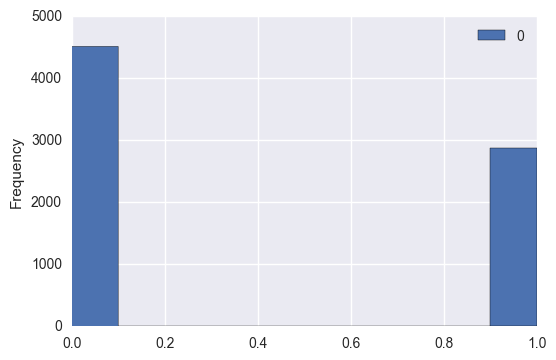

In [119]:
pd.DataFrame(predictions).plot(kind='hist')

In [ ]:
pd.DataFrame(predictions).plot